I recommend extracting the provided zip or downloading from [github](https://github.com/evanwporter/QuantumComputing) if that's not possible however then I pasted the entire code at the bottom. I didn't want to put it up here since I didn't want to junk up the notebook.

In [1]:
import sys
import os
sys.path.insert(0, os.path.abspath('../src'))

from QuantumCircuit import QuantumCircuit
import numpy as np

# Schrodinger's Cat

The most famous example of quantum mechanics is Shrodinger's Cat. The super simple explanation is if you put a some poison in a box. Then you put a cat in a box. Then you close the box. That cat may eat the poison (and die) or it may not eat the poison (and live). Now what if we assign notation to these states? We can let $|1\rangle$ represent the cat being alive and $|0\rangle$ representing the cat being dead

The kick of the problem is that you have no idea which state the cat is in. Whether its alive or dead, $|0\rangle$ or $|1\rangle$&mdash;you have no clue. Thus the cat is simultaneuosly alive *and* dead. This is known as superposition in quantum mechanics. We can represent this concept with the following graph&mdash;called a bloch sphere. The vector indicates that the cat is neither dead nor alive.

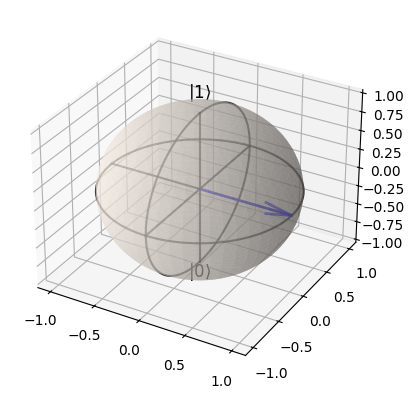

In [2]:
qc = QuantumCircuit(1)
qc.h(0).execute()
qc.bloch()

Now what if you bust open the box and look at the cat. Well you'll learn whether they are dead or alive pretty quickly. This is as known collapsing the state in quantum mechanics.

In [3]:
qc = QuantumCircuit(1)
qc.h(0).execute()
qc.probabilities

array([0.5, 0.5])

We then measure the probability. This attempts to simulate how many times the cat will be alive and how many times it will be dead. I set the number of shots (measurements/checks) to 1024 by default.

In [4]:
qc.measure()

{'0': 532, '1': 492}

We can measure less shots as well.

In [5]:
qc.measure(num_shots=30)

{'0': 16, '1': 14}

You'll that in both cases, the cat lives roughly half the time. This concept of super position is fundamental to quantum computing since it allows us to represent two states simultaneously.

But what if we add another qubit?

Then the possible states the qubits could collapse to would double. The possible states are for two qubits:

$$|00\rangle, |01\rangle, |10\rangle, |11\rangle$$

The number of possible states the qubit could collapse for $n$ qubits is $2^n$

# Haadamard Gate

Qubits can be manipulated using gates, and the Haadamard Gate is probably the most important gate. The reason its so important is becuase it creates a superposition.

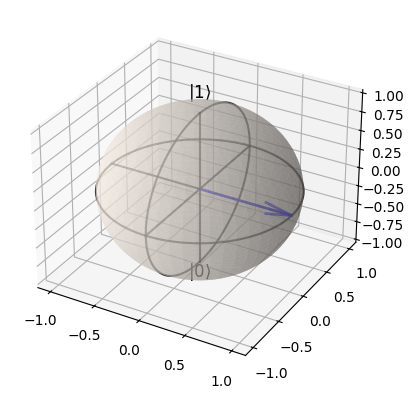

In [6]:
qc = QuantumCircuit(1)
qc.h(0).execute()
qc.bloch(1)

# Deutsch Problem

The Deutsch problem is a fundamental problem that demonstrates the power of Quantum Computing for exponential speedups. 

We can represent this using the function f. This function maps {0,1}→{0,1} and takes one input x, which represents is either 0 or 1 representing the coin in question. The output of f is either 0 for heads or 1 for tails.  Thus, for constant functions we have:

$$f(0)=0;f(1)=0$$
$$f(0)=1;f(1)=1$$

For balanced functions we have:

$$f(0)=0;f(1)=1$$
$$f(0)=1;f(1)=0$$

A classical computer would require two evaluations of `f` to differentiate whether the two coins are constant or balanced. As seen below.

In [7]:
def f(x: int):
    # return 0 if x == 0 else 0  # Constant function
    return 0 if x == 0 else 1  # Balanced function

f0 = f(0)
f1 = f(1)

if f0 == f1:
    print("The function is constant.")
else:
    print("The function is balanced.")

The function is balanced.


On the other hand, a quantum computer would only require a single evaluation of f.

The first step to do this on a quantum computer is to initialize the qubits. Two qubits are chosen. The first qubit shall represent the input to the function f. The second qubit represents the output of the function f. The auxiliary qubit starts with the NOT operation being performed on it. Then both qubits have the Hadamard Gate performed on them. This superimposed them. Currently there is an equal (25%) chance of the qubits collapsing to any of the four states. Now this is the interesting part that provides the quantum speedup in computing. When the coins are constant, then you encode y, with f. f here is the identity matrix.

When the coins are balanced, then you perform a controlled-NOT gate on the state. Essentially this checks whether the first qubit is in the ∣1⟩ state and if it is it flips it.

Thus, the qubit is flipped for balanced states and unchanged for constant states. Once you’ve modified the states over time, you apply the Hadamard gate to de-superimpose the qubits.

The following function applies these steps.

In [8]:
def deutsch(num_qubits, balanced):
   # QC with n qubits ( n-1 input qubits +  1 auxiliary qubut)
    circuit = QuantumCircuit(num_qubits)
    
    all_qubits = list(range(num_qubits))
    input_bits = all_qubits[:-1]
    auxilary_bit = all_qubits[-1]
    
    # FLip auxillary bit
    circuit.x(num_qubits - 1)
    
    # Apply Hadamard gates to all qubits to create superposition
    circuit.h(all_qubits)

    # Oracle
    if balanced: 
        # Apply cnot gate to all control bits
        # NOTE: technically chaining the cx gates in this way is the multi-control-not (mcx) but its easier to represent it like this
        for i in input_bits:
            circuit.cx(i, auxilary_bit)
    
    circuit.h(all_qubits)
    
    measurement = circuit.measure(target_qubits=[1], num_shots=1024)

    print("Measurement Results:", measurement)
    print("State Vector Results:", circuit.measure())
    
    # Determine if the function is constant or balanced
    if measurement['0'] == 1024:
        print("The function is constant.")
    else:
        print("The function is balanced.")

In [9]:
deutsch(2, True)
print()
deutsch(2, False)

Measurement Results: {'0': 0, '1': 1024}
State Vector Results: {'00': 0, '01': 0, '10': 0, '11': 1024}
The function is balanced.

Measurement Results: {'0': 1024, '1': 0}
State Vector Results: {'00': 0, '01': 0, '10': 1024, '11': 0}
The function is constant.


Now this works well enough but the real speed up comes when you have multiple coins since for n coins (or equivalently n-bit inputs), a classical computer would require at worst 2^n evaluations of f(x) to fully determine whether the function is constant or balanced (at best it would take 2 evaluations). This is due to the exponential growth in the number of possible input-output combinations that need to be checked. However, a quantum computer can solve this problem in just a single evaluation, regardless of the size of n.

In [10]:
deutsch(4, True)
print()
deutsch(4, False)

Measurement Results: {'0': 0, '1': 1024}
State Vector Results: {'0000': 0, '0001': 0, '0010': 0, '0011': 0, '0100': 0, '0101': 0, '0110': 0, '0111': 0, '1000': 0, '1001': 0, '1010': 0, '1011': 0, '1100': 0, '1101': 0, '1110': 0, '1111': 1024}
The function is balanced.

Measurement Results: {'0': 1024, '1': 0}
State Vector Results: {'0000': 0, '0001': 0, '0010': 0, '0011': 0, '0100': 0, '0101': 0, '0110': 0, '0111': 0, '1000': 1024, '1001': 0, '1010': 0, '1011': 0, '1100': 0, '1101': 0, '1110': 0, '1111': 0}
The function is constant.


# Other Cools Things Programmed Into The QC

## Pauli Gates

There are the Pauli-(X,Y,Z) gates for flipping the circuit around the bloch sphere.

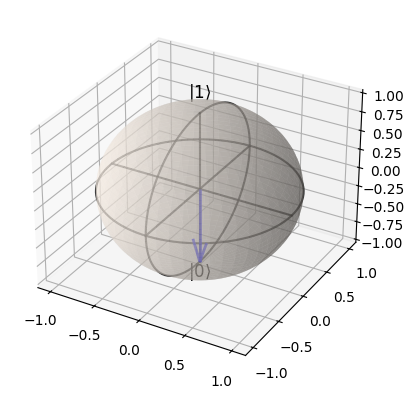

In [11]:
# Pauli-X gate
qc = QuantumCircuit(1)
qc.x(0).execute()
qc.bloch()

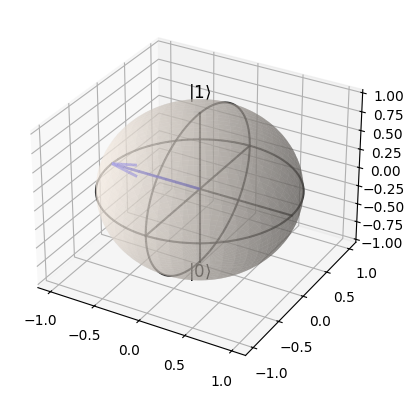

In [12]:
# Pauli-Y gate
qc = QuantumCircuit(1)
qc.h(0)
qc.y(0).execute()
qc.bloch()

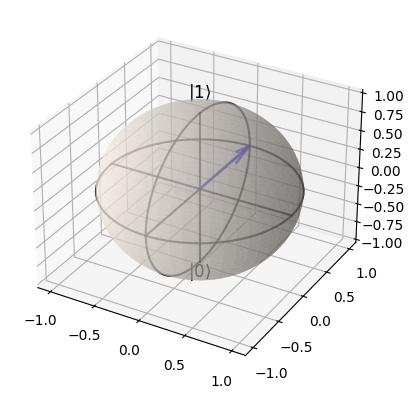

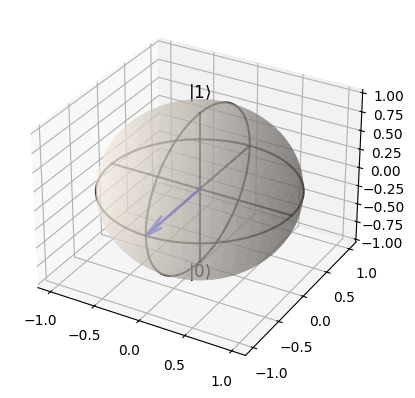

In [13]:
# Pauli-Z gate
qc = QuantumCircuit(1)
qc.h(0)
qc.rz(np.pi/2, 0)
qc.z(0).execute()
qc.bloch(2) # Note this displays the state after the `rz` gate has been applied
qc.bloch(3)

## Rotational Gates

For manipulating the vector around the sphere

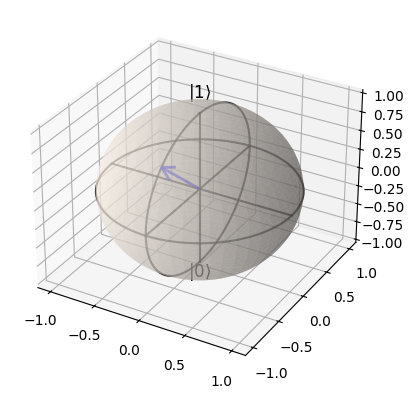

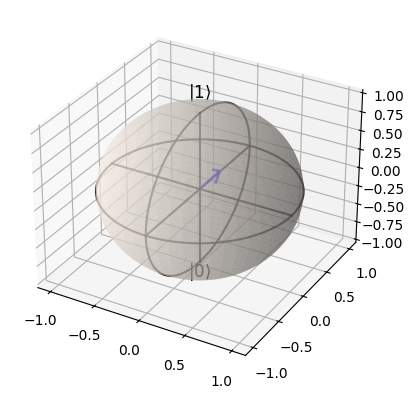

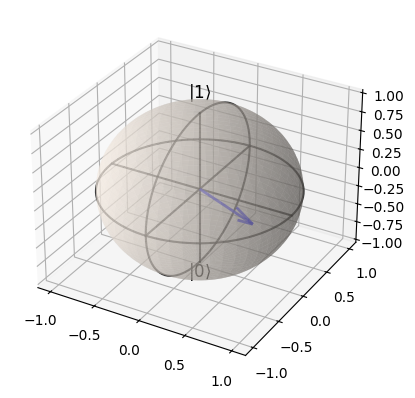

In [14]:
qc = QuantumCircuit(1)
# qc.h(0)
qc.rx(np.pi/4, 0)
qc.rz(np.pi/4, 0)
qc.ry(np.pi/4, 0)
qc.execute()
qc.bloch(1) # rx
qc.bloch(2) # rz
qc.bloch(3) # ry

## Bar Chart Display of Probabilities

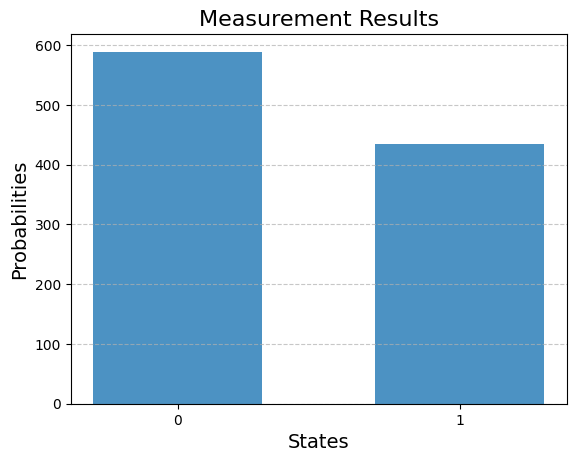

In [15]:
qc = QuantumCircuit(1)
# qc.h(0)
qc.rx(np.pi/4, 0)
qc.rz(np.pi/4, 0)
qc.ry(np.pi/4, 0)
qc.bar_chart([0])

This looks pretty good since the state vector is closer to the $|0\rangle$ than the $|1\rangle$.

Another interesting gate I added but didn't use is the `Control-Z` gate which is similar to the `Control-Not` except it applies a Pauli-Z gate to the target bit when the control bit is 1.

In [ ]:
# I haven't updated this since I added more comments. Please look at github rather than this.
import numpy as np
import numpy.typing as npt 
from typing import Self
import matplotlib.pyplot as plt

# Shared typings
type StateVector = npt.NDArray[np.complex128]
type GateMatrix = npt.NDArray[np.complex128]
type GateMatrixArray = npt.NDArray[np.complex128]
type index_t = int | slice | list[int]

def convert_index(index: index_t) -> list[int]:
    if isinstance(index, int):
        return [index]
    if isinstance(index, slice):
        print(index)
        return list(range(index.start, index.stop, index.step))
    else:
        return index
    
def generate_states(n: int) -> list[str]:
    """
    Lists out every state. 

    Example: For two qubits it would return

    [00, 01, 10, 11]
    """
    return [f"{i:0{n}b}" for i in range(2**n)]

def plot_measurement_results(measurement_results: dict[str, int]):
    states = list(measurement_results.keys())
    probabilities = list(measurement_results.values())

    plt.bar(states, probabilities, width=0.6, align="center", alpha=0.8)
    plt.xlabel("States", fontsize=14)
    plt.ylabel("Probabilities", fontsize=14)
    plt.title("Measurement Results", fontsize=16)
    
    # https://stackoverflow.com/a/60951760
    plt.grid(axis="y", linestyle="--", alpha=0.7)
    plt.show()

def plot_bloch_sphere(state_vector: StateVector):
    # This code was taken directly from the following link
    # https://stackoverflow.com/a/70445535
    fig = plt.figure()
    ax = fig.add_subplot(111, projection='3d') # type: ignore

    # Make data
    r = 1
    u = np.linspace(0, 2 * np.pi, 100)
    v = np.linspace(0, np.pi, 100)
    x = r * np.outer(np.cos(u), np.sin(v))
    y = r * np.outer(np.sin(u), np.sin(v))
    z = r * np.outer(np.ones(np.size(u)), np.cos(v))

    # Plot the surface
    ax.plot_surface(x, y, z, alpha=0.5, color='linen')

    # plot circular curves over the surface
    arr360 = np.linspace(0, 2 * np.pi, 100)
    z = np.zeros(100)
    x = r * np.sin(arr360)
    y = r * np.cos(arr360)

    ax.plot(x, y, z, color='black', alpha=0.75)
    ax.plot(z, x, y, color='black', alpha=0.75)

    ## add axis lines
    zeros = np.zeros(1000)
    line = np.linspace(-r,r,1000)

    ax.plot(line, zeros, zeros, color='black', alpha=0.75)
    ax.plot(zeros, line, zeros, color='black', alpha=0.75)
    ax.plot(zeros, zeros, line, color='black', alpha=0.75)

    
    # The Following Code Is My Own
    alpha, beta = state_vector[0], state_vector[1]

    theta = 2 * np.arccos(np.abs(alpha)) # Angle from the z-axis
    phi = np.angle(beta) - np.angle(alpha) # Angle in the xy-plane

    # Convert to Cartesian coordinates
    x = r * np.sin(theta) * np.cos(phi)
    y = r * np.sin(theta) * np.sin(phi)
    z = r * np.cos(theta)

    # State vector
    ax.quiver(0, 0, 0, x, y, z, color='blue', linewidth=2, alpha=0.75)

    # Labels for Poles |0> and |1>
    ax.text(0, 0, r + (r/5), r'$|1\rangle$', fontsize=12, ha='center')
    ax.text(0, 0, -r - (r/5), r'$|0\rangle$', fontsize=12, ha='center')

    plt.show()

class QuantumCircuit:
    num_qubits: int
    state: StateVector
    state_history: list[StateVector]
    gate_queue: GateMatrixArray # 3D Array to hold expanded matrices for each layer
    _gate_queue: GateMatrixArray
    _executed: bool = False

    def __init__(self, num_qubits: int):
        self.num_qubits = num_qubits
        self.state = np.zeros(2**num_qubits, dtype=complex)
        self.state[0] = 1
        self.state_history = [self.state.copy()]
        self._gate_queue = np.empty((0, 2**num_qubits, 2**num_qubits), dtype=complex) # 3D array
        self.gate_queue = self._gate_queue.copy()

    def _expand_gate(self, gate_matrix: GateMatrix, target_qubits: list[int]) -> GateMatrix:
        full_gate: GateMatrix = np.eye(1, dtype=complex)
        
        for i in range(self.num_qubits):
            if i in target_qubits:
                full_gate = np.kron(gate_matrix, full_gate)
            else:
                full_gate = np.kron(np.eye(2, dtype=complex), full_gate)
        
        return full_gate
    
    def _expand_partial_gate(self, gate_matrix: GateMatrix, target_qubits: list[int]) -> GateMatrix:
        num_target_qubits = int(np.log2(gate_matrix.shape[0]))

        if len(target_qubits) != num_target_qubits:
            raise ValueError(f"Gate acts on {num_target_qubits} qubits, but {len(target_qubits)} were provided.")

        full_gate = np.eye(1, dtype=complex)

        for i in range(self.num_qubits):
            if i in target_qubits:
                full_gate = np.kron(full_gate, gate_matrix)
            else:
                full_gate = np.kron(full_gate, np.eye(2, dtype=complex))

        return full_gate


    def _ensure_layer(self, layer: int):
        current_layers: int = self._gate_queue.shape[0]
        if layer >= current_layers:

            new_layers: int = layer - current_layers + 1
            identity_layer: GateMatrix = np.eye(2**self.num_qubits, dtype=complex)

            # Fill it with identity matrices
            identity_layers: GateMatrixArray = np.repeat(identity_layer[None, :, :], new_layers, axis=0)
            self._gate_queue = np.vstack((self._gate_queue, identity_layers))

    def add_gate(self, gate_matrix: GateMatrix, target_qubits: index_t, layer: int):
        normalized_target_qubits: list[int] = convert_index(target_qubits)
        expanded_gate: GateMatrix = self._expand_gate(gate_matrix, normalized_target_qubits)
        self.add_layer(expanded_gate, layer)

    def add_layer(self, gate_matrix: GateMatrix, layer: int):
        if layer == -1: layer = len(self._gate_queue)
        self._ensure_layer(layer)
        self._gate_queue[layer] = gate_matrix

    def execute(self):
        self._executed = True
        self.clear()
        for layer in self._gate_queue:
            self.state = layer @ self.state
            self.state_history.append(self.state.copy())

    def clear(self):
        self.gate_queue = self._gate_queue.copy()
        self.state_history = [self.state.copy()] # Flush the history

    def h(self, target_qubits: index_t, layer: int = -1) -> Self:
        """Haadarmard gate"""
        H = (1 / np.sqrt(2)) * np.array([[1, 1], [1, -1]])
        self.add_gate(H, target_qubits, layer)
        return self

    def x(self, target_qubits: index_t, layer: int = -1) -> Self:
        """Pauli-X gate"""
        X = np.array([[0, 1], [1, 0]])
        self.add_gate(X, target_qubits, layer=layer)
        return self

    def y(self, target_qubits: index_t, layer: int = -1) -> Self:
        """Pauli-Y gate"""
        Y = np.array([[0, -1j], [1j, 0]])
        self.add_gate(Y, target_qubits, layer=layer)
        return self

    def z(self, target_qubits: index_t, layer: int = -1) -> Self:
        """Pauli-Z gate"""
        Z = np.array([[1, 0], [0, -1]])
        self.add_gate(Z, target_qubits, layer=layer)
        return self

    def cx(self, control: int, target: int) -> Self:
        """Control Not Gate"""
        size = 2**self.num_qubits
        cx_matrix = np.eye(size, dtype=complex)

        for i in range(size):
            if (i >> control) & 1 == 1:
                target_state = i ^ (1 << target)
                cx_matrix[i, i] = 0
                cx_matrix[i, target_state] = 1

        self.add_layer(cx_matrix, -1)
        return self
    
    def cz(self, control: int, target: int) -> Self:
        """
        Control Z Gate
        
        Applies Z gate to target when control is 1.
        """
        size = 2**self.num_qubits
        cz_matrix = np.eye(size, dtype=complex)

        for i in range(size):
            if (i >> control) & 1 == 1 and (i >> target) & 1 == 1:
                cz_matrix[i, i] *= -1

        self.add_layer(cz_matrix, -1)
        return self

    # Bloch Sphere Gates
    def rx(self, theta: float, target_qubits: index_t, layer: int = -1) -> Self:
        """Rotation around X-axis"""
        RX = np.array([
            [np.cos(theta / 2), -1j * np.sin(theta / 2)],
            [-1j * np.sin(theta / 2), np.cos(theta / 2)]
        ])
        self.add_gate(RX, target_qubits, layer)
        return self

    def ry(self, theta: float, target_qubits: index_t, layer: int = -1) -> Self:
        """Rotation around Y-axis"""
        RY = np.array([
            [np.cos(theta / 2), -np.sin(theta / 2)],
            [np.sin(theta / 2), np.cos(theta / 2)]
        ])
        self.add_gate(RY, target_qubits, layer)
        return self

    def rz(self, theta: float, target_qubits: index_t, layer: int = -1) -> Self:
        """Rotation around Z-axis"""
        RZ = np.array([
            [np.exp(-1j * theta / 2), 0],
            [0, np.exp(1j * theta / 2)]
        ])
        self.add_gate(RZ, target_qubits, layer)
        return self
    
    def to_gate(self) -> GateMatrix:
        """Combine all gates in the circuit into a single gate."""

        unitary = np.eye(2**self.num_qubits, dtype=complex)
        
        for layer in self._gate_queue:
            unitary = layer @ unitary
        
        self.clear()
        return unitary
    
    def bloch(self, history: int=-1):
        if self.num_qubits != 1:
            raise KeyError(f"Error num_qubits is greater than one. Block sphere is only able to display a single qubit.")
        plot_bloch_sphere(self.state_history[history])
    
    @property
    def probabilities(self) -> npt.NDArray[np.int64]:
        return np.real( # force conversion into a real number
            np.square(np.abs(self.state))
         )

    def toffoli(self) -> Self:
        """
        Implement a 2-control Toffoli gate.
        """
        # https://www.cs.sfu.ca/~meamy/Teaching/f22/cmpt981/Lecture%205.pdf
        toff: GateMatrix = np.eye(8, dtype=complex)

        toff[[6, 7], [6, 7]] = 0
        toff[[6, 7], [7, 6]] = 1

        self.add_layer(toff, -1)

        return self        

        
    def measure(self, target_qubits: index_t | None = None, num_shots: int = 1024) -> dict[str, int]:
        if not self._executed: self.execute()  # Get the latest state

        if target_qubits is None:
            target_qubits = list(range(self.num_qubits))
        else:
            target_qubits = convert_index(target_qubits)

        basis_states = generate_states(self.num_qubits)

        marginal_basis = [
            ''.join(state[q] for q in target_qubits) for state in basis_states
        ]

        marginal_probs: dict[str, float] = {}
        for full_state, marginal_state in zip(basis_states, marginal_basis):
            marginal_probs[marginal_state] = marginal_probs.get(marginal_state, 0) + self.probabilities[int(full_state, 2)]

        total_prob = sum(marginal_probs.values())
        marginal_probs = {state: prob / total_prob for state, prob in marginal_probs.items()}

        # Simulate measurement outcomes
        outcomes = np.random.choice(
            list(marginal_probs.keys()),
            size=num_shots,
            p=list(marginal_probs.values())
        )

        # Count occurrences of each outcome
        measurement_results = {state: 0 for state in marginal_probs}
        for outcome in outcomes:
            measurement_results[outcome] += 1

        return measurement_results


    def bar_chart(self, target_qubits: index_t | None):
        measurement = {k: v for k, v in self.measure(target_qubits).items() if v != 0}
        plot_measurement_results(measurement)